# Homework 4

We have learned about the basics of using machine learning and deep learning for many computer vision problems. In this assignment, we will be building a framework for object classification using PyTorch.

Topics you will be learning in this assignment:
* Defining datasets in PyTorch;
* Defining models in PyTorch;
* Specifying the training procedure;
* Training and evaluating a model;
* Tuning hyper-parameters.

First of all, you may want to do `conda install pytorch torchvision -c pytorch` in your virtual environment to install PyTorch.

## 1. Object classification on CIFAR10 with a simple ConvNet.

As one of the most famous datasets in computer vision, [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) is an object classfication dataset that consists of 60000 color RGB images in 10 classes, with 6000 images per class. The images are all at a resolution of 32x32. In this section, we will be working out a framework that is able to tell us what object there is in a given image, using a simple Convolution Neural Network.

### 1.1 Data preparation.

The most important ingredient in a deep learning recipe is arguably data - what we feed into the model largely determines what we get out of it. In this part, let's prepare our data in a format that will be best useable in the rest of the framework.

For vision, there's a useful package called `torchvision` that defines data loaders for common datasets as well as various image transformation operations. Let's first load and normalize the training and testing dataset using `torchvision`. 

As a quick refresher question. Why do we want to split our data into training and testing sets? (5 points)

**You answer here:**
>
>因为将数据划分为训练集和数据集两部分有利于测试模型在没有见过的数据上的效果，使模型的泛化能力更强。而如果将所有数据作为训练集和测试集，可能会出现过拟合的情况。

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import random
import os
# set random seeds
torch.manual_seed(2023)
np.random.seed(2023)
random.seed(2023)

From this step, you want to create two dataloaders `trainloader` and `testloader` from which we will query our data. You might want to familiarize yourself with PyTorch data structures for this. Specifically, `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` might be helpful here. `torchvision` also provides convenient interfaces for some popular datasets including CIFAR10, so you may find `torchvision.datasets` helpful too.


When dealing with image data, oftentimes we need to do some preprocessing to convert the data to the format we need. In this problem, the main preprocessing we need to do is normalization. Specifically, let's normalize the image to have 0.5 mean and 0.5 standard deviation for each of the 3 channels. Feel free to add in other transformations you may find necessary. `torchvision.transforms` is a good point to reference.

Why do we want to normalize the images beforehand? (5 points)

*HINT*: consider the fact that the network we developed will be deployed to a large number of images. 

**You answer here:**
>
>1.归一化可以减小数据间的方差，将数据变为无量纲的数据，从而提高网络的泛化能力，而良好的泛化能力有助于准确地处理大量的数据。
>
>2.归一化可以使输入的范围一致，可以提高神经网络的训练速度和精度，减少训练过程中的梯度消失或爆炸问题。
>
>3.归一化可以使输入分布范围限制在0和1之间，增强数据的可分性，降低过拟合风险。

In [2]:
trainloader = None
testloader = None
batch_size = 4

### YOUR CODE HERE (10 points)
pass
transform = transforms.Compose(
  [transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 创建trainloader和testloader
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
  download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(
    dataset = train_dataset,      
    batch_size = batch_size,      
    shuffle = True,               
    num_workers = 2
)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
  download=True, transform=transform)
testloader = torch.utils.data.DataLoader(
    dataset = test_dataset,      
    batch_size = batch_size,      
    shuffle = False,               
    num_workers = 2
)
### END YOUR CODE

# these are the 10 classes we have in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# running this block will take a few minutes to download the dataset if you haven't done so

Files already downloaded and verified
Files already downloaded and verified


Let's plot out some training images to see what we are dealing with:

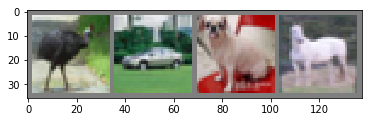

 bird   car   dog horse


In [4]:
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

### 1.2 Model definition.

Now we have the data ready, the next step is to define the model that we want to train on these data. Since CIFAR10 is a small dataset, we'll just build a very simple Convolutional Neural Network for our problem. The architecture of it will be (in order):

* 2D convolution: output feature channel number = 6, kernel size = 5x5, stride = 1, no padding;
* 2D max pooling: kernel size = 2x2, stride = 2;
* 2D convolution: output feature channel number = 16, kernel size = 5x5, stride = 1, no padding;
* 2D max pooling: kernel size = 2x2, stride = 2;
* Fully-connected layer: output feature channel number = 120;
* Fully-connected layer: output feature channel number = 84;
* Fully-connected layer: output feature channel number = 10 (number of classes).

Implement the `__init__()` and `forward()` functions in `network.py`. As a good practice, `__init__()` generally defines the network architecture and `forward()` takes the runtime input `x` and passes through the network defined in `__init__()`, and returns the output. (15 points)

In [5]:
from network import Net
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Net()
net.to(device)

Net(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Linear(in_features=120, out_features=84, bias=True)
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)

### 1.3 Loss and optimizer definition.

Okay we now have the model too! The next step is to train the model on the data we have prepared. But before that , we first need to define a loss function and an optimization procedure, which specifies how well our model does and how the training process is carried out, respectively. We'll be using Cross Entropy loss as our loss function and Stochastic Gradient Descent as our optimization algorithm. We will not cover them in detail here but you are welcome to read more on it. ([this article](https://cs231n.github.io/neural-networks-2/) and [this article](https://cs231n.github.io/optimization-1/) from CS231n would be a great point to start). 

PyTorch implements very convenient interfaces for loss functions and optimizers, which we have put for you below.

In [6]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 1.4 Kick start training.

What we have done so far prepares all the necessary pieces for actual training, and now let's kick start the training process! Running this training block should take just several minutes on your device(CPU or GPU).

In [7]:
epoch_num = 2
for epoch in range(epoch_num):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.to(device)
        labels=labels.to(device)

        ### YOUR CODE HERE (10 points)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        pass
        ### END YOUR CODE

        # print statistics
        running_loss += loss.item()
        if (i+1) % 2000 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.969
[1,  4000] loss: 1.712
[1,  6000] loss: 1.604
[1,  8000] loss: 1.539
[1, 10000] loss: 1.480
[1, 12000] loss: 1.463
[2,  2000] loss: 1.386
[2,  4000] loss: 1.376
[2,  6000] loss: 1.379
[2,  8000] loss: 1.360
[2, 10000] loss: 1.347
[2, 12000] loss: 1.345
Finished Training


The last step of training is to save the trained model locally to a checkpoint:

In [8]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### 1.5 Test the trained model on the test data.

Remember earlier we split the data into training and testing set? Now we'll be using the testing split to see how our model performs on unseen data. We'll check this by predicting the class label that the neural network outputs, and comparing it against the ground-truth.

Let's first examine some data from the testing set:

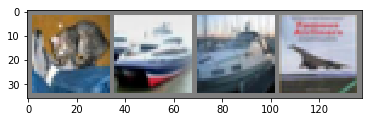

GroundTruth:    cat  ship  ship plane


In [9]:
testiter = iter(testloader)
images, labels = testiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Now, let's load in our saved model checkpoint and get its output:

In [10]:
# load in model checkpoint
net = Net()
net.load_state_dict(torch.load(PATH))
net.to(device)

Net(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Linear(in_features=120, out_features=84, bias=True)
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [11]:
# First, get the output from the model by passing in `images`;
# Next, think about what the model outputs mean / represent, and convert it to the predicted class index (`predicted`);
# Finally, output the predicted class label (already done for you).

predicted = []
### YOUR CODE HERE (10 points)
pass
output = net(images)
predicted = torch.argmax(output, dim=1)
### END YOUR CODE
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car plane plane


How does your prediction look like? Does that match your expectation? Write a few sentences to describe what you got and provide some analysis if you have any. (5 points)

**You answer here:** 
>
>得到的结果中，第一个和第四个结果与ground truth一致，第二个和第三个结果预测错误，准确率为50%，与我所期望的准确率差不多。导致预测错误的原因可能是该网络本身较为简单，没有很全面地学习到各类物体的特征。

Besides inspecting these several examples, let's also look at how the network performs on the entire testing set by calculating the percentage of correctly classified examples.

In [12]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Similar to the previous question, calculate model's output and the percentage as correct / total
        ### YOUR CODE HERE (10 points)
        pass
        output = net(images)
        predicted = torch.argmax(output, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        ### END YOUR CODE

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


What accuracy did you get? Compared to random guessing, does your model perform significantly better? (5 points)

**You answer here:**
>
>我获得的准确度是54%，比随机猜测的准确度10%要大许多，但是仍然不够高，可能需要进一步的优化。
>

Let's do some analysis to gain more insights of the results. One analysis we can carry out is the accuracy for each class, which can tell us what classes our model did well, and what classes our model did poorly.

In [13]:
# prepare to count predictions for each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # repeat what you did previously, but now for each class
        ### YOUR CODE HERE (10 points)
        pass
        output = net(images)
        predicted = torch.argmax(output, dim=1)
        list_pre = predicted.tolist()
        index = 0
        for label in labels:
            class_total[label] += 1
            # 更新每个类别的准确度
            if list_pre[index] == label:
                class_correct[label] += 1
            index += 1
        ### END YOUR CODE

# print accuracy for each class
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 65 %
Accuracy of   car : 68 %
Accuracy of  bird : 30 %
Accuracy of   cat : 42 %
Accuracy of  deer : 49 %
Accuracy of   dog : 31 %
Accuracy of  frog : 75 %
Accuracy of horse : 59 %
Accuracy of  ship : 55 %
Accuracy of truck : 63 %


### 1.6 Hyper-parameter tuning.

An important phase in deep learning framework is hyper-parameter search. Hyper-parameters generally refer to those parameters that are **not** automatically optimized during the learning process, e.g., model architecture, optimizer, learning rate, batch size, training length, etc. Tuning these hyper-parameters could often lead to significant improvement of your model performance.

Your job in this section is to identify the hyper-parameters and tune them to improve the model performance as much as possible. You might want to refer to PyTorch documentation or other online resources to gain an understanding of what these hyper-parameters mean. Some of the options you might want to look into are:
* Model architecture (number of layers, layer size, feature number, etc.);
* Loss and optimizer (including loss function, regularization, learning rate, learning rate decay, etc.);
* Training configuration (batch size, epoch number, etc.).
These are by no means a complete list, but is supposed to give you an idea of the hyper-parameters. You are encouraged to identify and tune more.

Report in detail what you did in this section. Which of them improved model performance, and which did not? (15 points)

**You answer here:**
>我在本任务中对epoch，网络架构，batch_size和optimizer的学习率四个方面进行了超参数调整的尝试，得到的最高的准确率为64%。
>
>获得的主要结论是：适当增加epoch可以提升模型性能，在网络架构中使用ReLU激活函数可以提升模型性能，适当增加batch_size可以提升模型性能，增大学习率可能降低模型的性能。
>
>详细步骤和相关分析如下：
>
>***第一步：修改epoch为15***
>
>首先将epoch从2修改为15，再次运行整个程序，发现准确率由原来的54%提升到了59%，说明适当增大epoch可以有效提升模型的性能。
>
>***第二步：修改network架构***
>
>在上一步的基础上修改网络的架构，在卷积层之后和池化层之后分别都加上一个ReLU激活函数，再次运行整个程序，发现准确率由59%提升到了62%，说明使用ReLU激活函数可以有效提升模型的性能。
>
>***第三步：修改batch_size为12***
>
>在上一步的基础上将batch_size从4修改为12，再次运行整个程序，发现准确率由62%提升到了63%，说明适当增加batch_size可以提升模型的性能。
>
>***第四步：修改epoch为50***
>
>在上一步的基础上修改epoch为50，再次运行整个程序，发现准确率由63%提升到了64%，说明适当增大epoch可以提升模型的性能。
>
>***第五步：修改optimizer的学习率***
>
>在上一步的基础上修改optimizer的学习率：
>
>首先将学习率修改为0.0005，再次运行整个程序，发现准确率仍然为64%，说明本次修改对模型性能的提升帮助不大。
>
>再将学习率修改为0.005，再次运行整个程序，发现准确率为57%，说明增大学习率可能会降低模型的性能。